In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import joblib

In [2]:
file_path = './nordics_weather.csv' 
weather_data = pd.read_csv(file_path)
print("Data Loaded Successfully.")
print("Initial Data Snapshot:")
print(weather_data.head())

Data Loaded Successfully.
Initial Data Snapshot:
   country      date  precipitation  snow_depth       tavg      tmax  \
0  Finland  1/1/2015       1.714141  284.545455   1.428571  2.912739   
1  Finland  1/2/2015      10.016667  195.000000   0.553571  2.358599   
2  Finland  1/3/2015       3.956061  284.294118  -1.739286  0.820382   
3  Finland  1/4/2015       0.246193  260.772727  -7.035714 -3.110828   
4  Finland  1/5/2015       0.036364  236.900000 -17.164286 -8.727564   

        tmin  
0  -1.015287  
1  -0.998718  
2  -3.463871  
3  -9.502581  
4 -19.004487  


In [3]:
print("\nConverting 'date' column to datetime and extracting year, month, day...")
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%m/%d/%Y')
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
weather_data['day'] = weather_data['date'].dt.day
print("Date conversion complete. Snapshot after adding year, month, day columns:")
print(weather_data[['date', 'year', 'month', 'day']].head())


Converting 'date' column to datetime and extracting year, month, day...
Date conversion complete. Snapshot after adding year, month, day columns:
        date  year  month  day
0 2015-01-01  2015      1    1
1 2015-01-02  2015      1    2
2 2015-01-03  2015      1    3
3 2015-01-04  2015      1    4
4 2015-01-05  2015      1    5


In [4]:
print("\nEncoding 'country' column as a numerical variable...")
label_encoder = LabelEncoder()
weather_data['country_encoded'] = label_encoder.fit_transform(weather_data['country'])
print("Encoding complete. Unique country values and encoded labels:")
print(weather_data[['country', 'country_encoded']].drop_duplicates().head())




Encoding 'country' column as a numerical variable...
Encoding complete. Unique country values and encoded labels:
      country  country_encoded
0     Finland                0
1826   Norway                1
3652   Sweden                2


In [5]:
print("\nDropping unnecessary columns ('country' and 'date')...")
processed_data = weather_data.drop(columns=['country', 'date'])
print("Data after dropping columns:")
print(processed_data.head())



Dropping unnecessary columns ('country' and 'date')...
Data after dropping columns:
   precipitation  snow_depth       tavg      tmax       tmin  year  month  \
0       1.714141  284.545455   1.428571  2.912739  -1.015287  2015      1   
1      10.016667  195.000000   0.553571  2.358599  -0.998718  2015      1   
2       3.956061  284.294118  -1.739286  0.820382  -3.463871  2015      1   
3       0.246193  260.772727  -7.035714 -3.110828  -9.502581  2015      1   
4       0.036364  236.900000 -17.164286 -8.727564 -19.004487  2015      1   

   day  country_encoded  
0    1                0  
1    2                0  
2    3                0  
3    4                0  
4    5                0  


In [6]:
X = processed_data.drop(columns=['tavg']) 
y = processed_data['tavg'] 
print("Data after dropping columns:")
print(processed_data.head())



Data after dropping columns:
   precipitation  snow_depth       tavg      tmax       tmin  year  month  \
0       1.714141  284.545455   1.428571  2.912739  -1.015287  2015      1   
1      10.016667  195.000000   0.553571  2.358599  -0.998718  2015      1   
2       3.956061  284.294118  -1.739286  0.820382  -3.463871  2015      1   
3       0.246193  260.772727  -7.035714 -3.110828  -9.502581  2015      1   
4       0.036364  236.900000 -17.164286 -8.727564 -19.004487  2015      1   

   day  country_encoded  
0    1                0  
1    2                0  
2    3                0  
3    4                0  
4    5                0  


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data after dropping columns:")
print(processed_data.head())

Data after dropping columns:
   precipitation  snow_depth       tavg      tmax       tmin  year  month  \
0       1.714141  284.545455   1.428571  2.912739  -1.015287  2015      1   
1      10.016667  195.000000   0.553571  2.358599  -0.998718  2015      1   
2       3.956061  284.294118  -1.739286  0.820382  -3.463871  2015      1   
3       0.246193  260.772727  -7.035714 -3.110828  -9.502581  2015      1   
4       0.036364  236.900000 -17.164286 -8.727564 -19.004487  2015      1   

   day  country_encoded  
0    1                0  
1    2                0  
2    3                0  
3    4                0  
4    5                0  



Visualizing data distribution for temperature and precipitation...


Text(0.5, 1.0, 'Average Temperature Distribution')

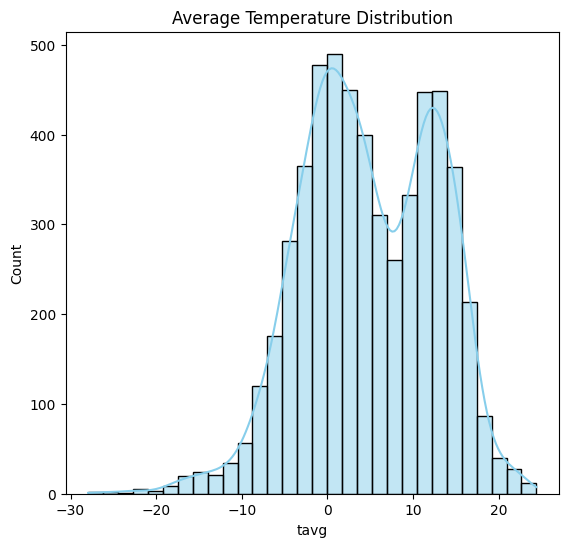

In [8]:
print("\nVisualizing data distribution for temperature and precipitation...")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(weather_data['tavg'], kde=True, bins=30, color='skyblue')
plt.title('Average Temperature Distribution')

Text(0.5, 1.0, 'Precipitation Distribution')

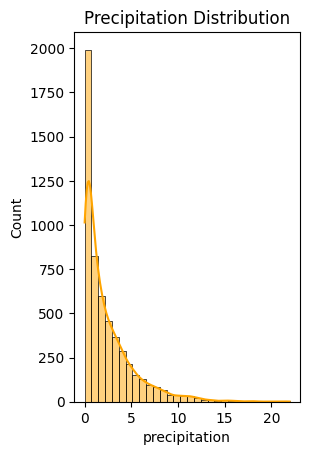

In [9]:
plt.subplot(1, 2, 2)
sns.histplot(weather_data['precipitation'], kde=True, bins=30, color='orange')
plt.title('Precipitation Distribution')


In [10]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


Generating heatmap of feature correlations...


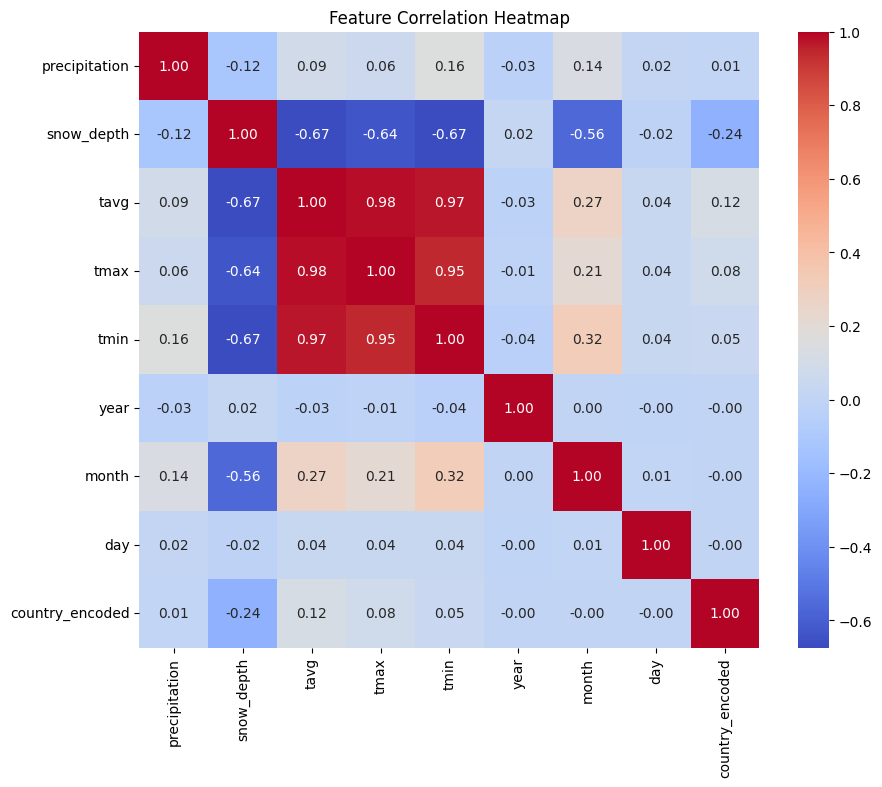

In [11]:
print("\nGenerating heatmap of feature correlations...")
plt.figure(figsize=(10, 8))
sns.heatmap(processed_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}
print("\nModels initialized: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor")



Models initialized: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor


In [13]:
model_performance = {}
predictions = {}


In [14]:
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    model.fit(X_train, y_train)
  
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    model_performance[model_name] = {"MAE": mae, "RMSE": rmse}
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")
   




Training Linear Regression...
Linear Regression - MAE: 0.7816, RMSE: 0.9867

Training Random Forest Regressor...


c:\Users\Shahryar Rza\Documents\Joseph_Tutorial\pred\env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Shahryar Rza\Documents\Joseph_Tutorial\pred\env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor - MAE: 0.5166, RMSE: 0.7017

Training Gradient Boosting Regressor...
Gradient Boosting Regressor - MAE: 0.5092, RMSE: 0.6868


c:\Users\Shahryar Rza\Documents\Joseph_Tutorial\pred\env\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Plotting model performance (MAE and RMSE for each model)...


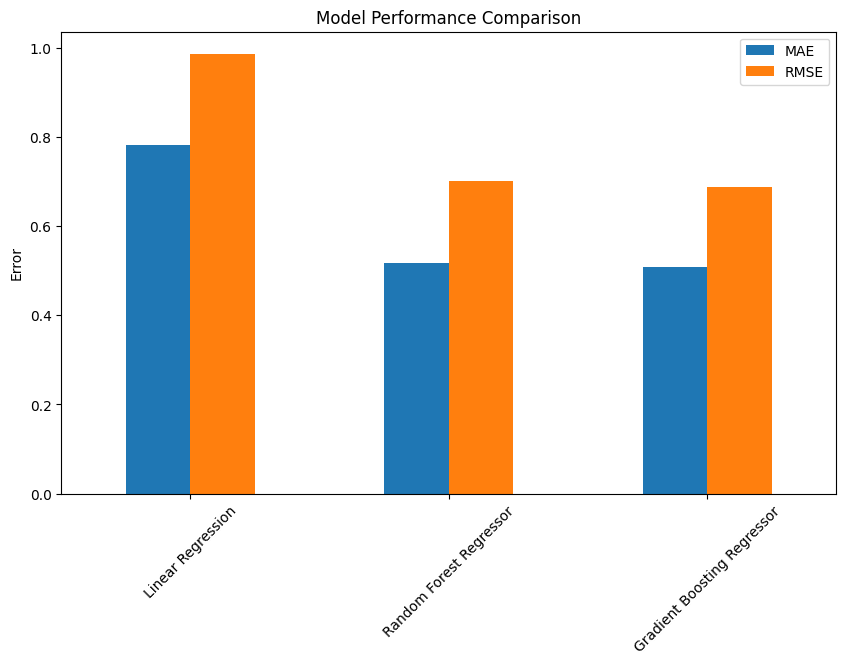

In [15]:
print("\nPlotting model performance (MAE and RMSE for each model)...")

performance_df = pd.DataFrame(model_performance).T
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()



Plotting Actual vs Predicted Temperatures for Gradient Boosting Regressor...


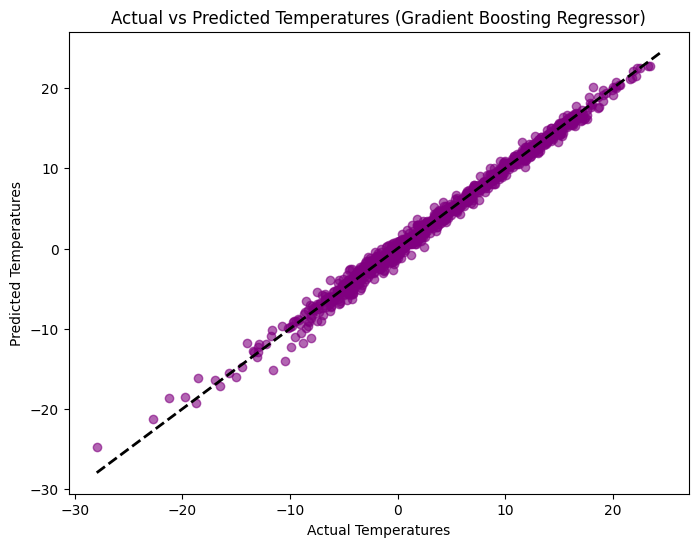

In [16]:
best_model_name = 'Gradient Boosting Regressor'
print(f"\nPlotting Actual vs Predicted Temperatures for {best_model_name}...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions[best_model_name], alpha=0.6, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Temperatures")
plt.ylabel("Predicted Temperatures")
plt.title(f"Actual vs Predicted Temperatures ({best_model_name})")
plt.show()

In [17]:
print("\nTraining Gradient Boosting Regressor...")
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train, y_train)
print("Model trained successfully.")


Training Gradient Boosting Regressor...
Model trained successfully.


In [18]:
joblib.dump(best_model, 'gradient_boosting_model.pkl')
print("Gradient Boosting Regressor model saved as 'gradient_boosting_model.pkl'.")


Gradient Boosting Regressor model saved as 'gradient_boosting_model.pkl'.


In [19]:
loaded_model = joblib.load('gradient_boosting_model.pkl')
print("\nLoaded the Gradient Boosting model for testing.")


Loaded the Gradient Boosting model for testing.


In [20]:
new_data = pd.DataFrame({
    'precipitation': [0.5],
    'snow_depth': [0.0],  
    'tmax': [25.0],
    'tmin': [15.0],
    'year': [2023],
    'month': [7],
    'day': [15],
    'country_encoded': [label_encoder.transform(['Sweden'])[0]]  
})

for col in X.columns:
    if col not in new_data.columns:
        new_data[col] = 0  

print("\nNew data sample for testing (aligned with training features):")
print(new_data)

print("\nMaking predictions on new data sample...")
new_data_pred = loaded_model.predict(new_data)
print(f"Predicted Average Temperature for new data: {new_data_pred[0]:.2f}")



New data sample for testing (aligned with training features):
   precipitation  snow_depth  tmax  tmin  year  month  day  country_encoded
0            0.5         0.0  25.0  15.0  2023      7   15                2

Making predictions on new data sample...
Predicted Average Temperature for new data: 20.06


In [23]:
from joblib import dump
dump(model, './weather_project/savedModels/model.joblib')

['./weather_project/savedModels/model.joblib']